# US Housing Market Analysis

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [2]:
# Read in data
file_path = Path("data/housing_data2.csv")
df = pd.read_csv(file_path)
df.head()

,Date,Price Index,GDP,30-Year Rate Avg,Monthly Supply,Median Price,Permits,Sentiment Index
0,1987-01-01,63.734,4722.156,9.2040,6.0,97900.0,1690.0,90.4
1,1987-02-01,64.134,4722.156,9.0825,6.2,97900.0,1689.0,90.2
2,1987-03-01,64.469,4722.156,9.0350,6.0,97900.0,1704.0,90.8
3,1987-04-01,64.973,4806.160,9.8325,6.0,103400.0,1601.0,92.8
4,1987-05-01,65.547,4806.160,10.5960,6.7,103400.0,1500.0,91.1


In [3]:
df.tail()

,Date,Price Index,GDP,30-Year Rate Avg,Monthly Supply,Median Price,Permits,Sentiment Index
428,2022-09-01,300.451,25723.941,6.1120,9.7,468000.0,1588.0,58.6
429,2022-10-01,298.672,26137.992,6.9000,9.7,479500.0,1555.0,59.9
430,2022-11-01,296.809,26137.992,6.8050,9.4,479500.0,1402.0,56.8
431,2022-12-01,294.266,26137.992,6.3640,8.5,479500.0,1409.0,59.7
432,2023-01-01,292.444,26486.287,6.2725,8.1,436800.0,1354.0,64.9


In [4]:
# create a new column called 'PRICE_CHANGE_UP_DOWN' and set the values to 0 if the value of the 'CSUSHPISA' column is less than the value of the previous row, otherwise set the value to 1
df["Price Change"] = np.where(df["Price Index"] < df["Price Index"].shift(1), 0, 1)
df.tail(10)

,Date,Price Index,GDP,30-Year Rate Avg,Monthly Supply,Median Price,Permits,Sentiment Index,Price Change
423,2022-04-01,301.789,25248.476,4.9825,8.5,449300.0,1795.0,65.2,1
424,2022-05-01,306.569,25248.476,5.2300,8.3,449300.0,1708.0,58.4,1
425,2022-06-01,308.334,25248.476,5.5220,9.5,449300.0,1701.0,50.0,1
426,2022-07-01,307.135,25723.941,5.4125,10.1,468000.0,1658.0,51.5,0
427,2022-08-01,303.649,25723.941,5.2225,8.7,468000.0,1586.0,58.2,0
428,2022-09-01,300.451,25723.941,6.1120,9.7,468000.0,1588.0,58.6,0
429,2022-10-01,298.672,26137.992,6.9000,9.7,479500.0,1555.0,59.9,0
430,2022-11-01,296.809,26137.992,6.8050,9.4,479500.0,1402.0,56.8,0
431,2022-12-01,294.266,26137.992,6.3640,8.5,479500.0,1409.0,59.7,0
432,2023-01-01,292.444,26486.287,6.2725,8.1,436800.0,1354.0,64.9,0


In [5]:
# get the value counts for the PRICE_CHANGE_UP_DOWN column
df["Price Change"].value_counts()

1    317
0    116
Name: Price Change, dtype: int64

# Defining the feature and target variables

In [6]:
# Define features set
X = df.copy()
X = X.drop("Date", axis=1)
X = X.drop("Price Index", axis=1)
X = X.drop("Price Change", axis=1)
# drop first row
X = X.iloc[1:]
X.head()

,GDP,30-Year Rate Avg,Monthly Supply,Median Price,Permits,Sentiment Index
1,4722.156,9.0825,6.2,97900.0,1689.0,90.2
2,4722.156,9.0350,6.0,97900.0,1704.0,90.8
3,4806.160,9.8325,6.0,103400.0,1601.0,92.8
4,4806.160,10.5960,6.7,103400.0,1500.0,91.1
5,4806.160,10.5375,6.9,103400.0,1522.0,91.5


In [7]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(432, 6)
GDP                 0
30-Year Rate Avg    0
Monthly Supply      0
Median Price        0
Permits             0
Sentiment Index     0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [8]:
# Define target vector 'PRICE_CHANGE_UP_DOWN' as y
y = df["Price Change"].values.reshape(-1, 1)
y = y[1:]
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

# Splitting the data into training and testing sets

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [12]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled.shape

(108, 6)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [13]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [14]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [15]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [1 1 1 0 0 1 1 0 1 1]
First 10 Actual labels: [[1], [1], [1], [0], [1], [1], [1], [0], [1], [1]]


# Evaluating the Random Forest model

In [16]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,NaN
4,0.0,1.0,1.0,100.0
5,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0
7,0.0,0.0,0.0,NaN
8,1.0,1.0,0.0,0.0
9,1.0,1.0,0.0,0.0


In [17]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: -0.009259259259259259


In [18]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1388888888888889


In [19]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.37267799624996495


In [20]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: inf


In [21]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.8611111111111112


# Feature importance

In [22]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

GDP: (0.1531162515411095)
30-Year Rate Avg: (0.14759841310381178)
Monthly Supply: (0.23262162094745872)
Median Price: (0.11558615068521687)
Permits: (0.16320473979967115)
Sentiment Index: (0.1878728239227319)


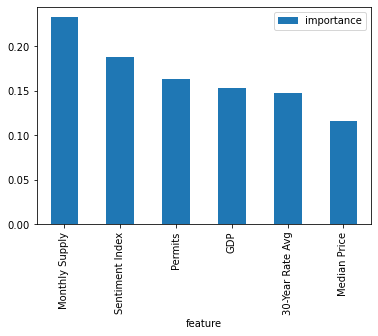

In [23]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
plt.show()

In [24]:
# use plotly to create a bar chart of the feature importance
fig = px.bar(feature_importance_df, x=feature_importance_df.index, y="importance", title="Feature Importance")
# save the graph
fig.write_image("images/feature_importance_streamlined.png")
fig.show()

In [25]:
# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# display the confusion matrix
display(cm_df)


,Predicted 0,Predicted 1
Actual 0,21,8
Actual 1,7,72


In [26]:
# print the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.90      0.91      0.91        79

    accuracy                           0.86       108
   macro avg       0.82      0.82      0.82       108
weighted avg       0.86      0.86      0.86       108



In [27]:
# define a function to output images of tables
def save_df_as_image(df, filename):
    source = ColumnDataSource(df)
    columns = [TableColumn(field=Ci, title=Ci) for Ci in df.columns]  # bokeh columns
    # add index column
    columns.insert(0, TableColumn(field="index", title="index"))
    # use df index as index column
    source.add(df.index, "index")
    data_table = DataTable(columns=columns, source=source, width=800, height=280)
    export_png(data_table, filename=filename)

In [28]:
# save a table of the feature importance
save_df_as_image(feature_importance_df, "images/feature_importance_streamlined_table.png")

In [29]:
# save a table of the confusion matrix
save_df_as_image(cm_df, "images/confusion_matrix_streamlined_table.png")

In [30]:
# save a table of the classification report
classification_report_df = pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose()
save_df_as_image(classification_report_df, "images/classification_report_streamlined_table.png")